In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir
from scipy.stats import norm

In [2]:
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)

from utils import style

In [3]:
style()

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
name = "GUMS"
data_dir = join(root_data_dir, name)
data_dir

'/home2/s20321005/Thesis-Project/Data/GUMS'

In [7]:
files = glob(join(data_dir, "gaia*.hdf5"))
files.sort()
files[:5]

['/home2/s20321005/Thesis-Project/Data/GUMS/gaia-000-010.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-010-020.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-020-030.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-030-040.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-040-050.hdf5']

In [8]:
gums_raw = vaex.open_many(files)
gums_raw = gums_raw.filter("barycentric_distance < 300")
gums_raw = gums_raw.extract()
gums_raw

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type
0,1.6633632254125095,-80.81886027273642,171.25262,75.92415,45.558952,-14.95211,14.412109,15.217319,13.49711,-0.08759593,0.06376102,0.554,1,4.741,3917.4187,K9V
1,1.6633711320080191,-80.81885970019108,171.25262,75.92415,45.558964,-34.88502,15.204739,16.016167,14.287737,-0.08759593,0.06376102,0.39,1,4.925,3899.42,K9V
2,1.6633664910531227,-80.81886003627946,171.25262,75.92415,45.558956,-23.187105,13.985069,14.792296,13.069419,-0.08759593,0.06376102,0.944,1,nan,nan,
3,2.0160566943963447,-83.75989510027239,288.9824,-22.14552,-24.457523,72.62629,11.677238,12.009957,11.15493,-0.6232309,0.25761986,0.932,2,4.253,6109.4204,F8V
4,4.987826313220024,-82.07222473744288,299.83878,31.349789,11.576215,-3.0559165,13.692413,14.255208,12.951837,-0.10409809,0.03148368,1.361,1,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,806,055",357.9938395214495,89.44461838971934,295.60757,14.734772,-6.07592,-42.785004,16.834896,17.786804,15.84237,-0.782781,0.2952876,0.385,2,4.932,3732.5015,M1V
"4,806,056",357.9939985418888,89.44461566869948,295.60757,14.7347555,-6.075962,-15.225407,17.434896,18.386805,16.442371,-0.782781,0.2952876,0.31,2,4.977,3647.5396,M1.5V
"4,806,057",357.99388598016196,89.44461763789015,295.60757,14.734767,-6.0759325,-25.578608,15.725681,16.67759,14.733155,-0.782781,0.2952876,1.104,2,nan,nan,
"4,806,058",356.1976688729908,89.47798819737298,252.35982,6.717475,-6.3655577,-11.070242,14.328016,14.998922,13.506746,-0.23560499,0.044221353,0.658,1,4.69,4305.266,K6V


In [9]:
# sample 5%
gums = gums_raw.sample(frac=0.05, random_state=42)
gums = gums.extract()
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type
0,188.11568702026864,-38.81476425701294,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V
1,111.15051477683905,76.43207497143165,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V
2,70.35334383756425,-48.82126568431621,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,
3,291.95704217863744,10.022120149413938,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V
4,252.30223580485048,60.13159356234094,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",173.05975053915682,-7.24855416061298,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V
"240,299",128.04011138876967,53.87230028290236,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V
"240,300",97.87481753929278,53.32539862199904,217.38063,52.85735,15.226079,-35.05593,12.532453,12.922139,11.955267,-0.5111747,0.17708947,0.766,2,4.608,5345.6436,G7V
"240,301",314.95508822212355,78.18766736931352,213.68085,55.313232,34.165936,-35.596634,17.488617,18.630993,16.406973,-0.843189,0.21133132,0.225,2,5.054,3499.4517,M2.5V


In [10]:
# transform ra,dec to galactic coordinates
ra = gums['ra'].to_numpy()
dec = gums['dec'].to_numpy()

from astropy.coordinates import SkyCoord
from astropy import units as u

c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
l, b = c.galactic.l.value, c.galactic.b.value
gums['l'] = l*np.pi/180
gums['b'] = b*np.pi/180
gums["ra"] = gums["ra"]*np.pi/180
gums["dec"] = gums["dec"]*np.pi/180
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897
"240,300",1.7082378208493534,0.9307037808923304,217.38063,52.85735,15.226079,-35.05593,12.532453,12.922139,11.955267,-0.5111747,0.17708947,0.766,2,4.608,5345.6436,G7V,2.8244566408131435,0.32523396707635766
"240,301",5.4970032853852695,1.364632230048654,213.68085,55.313232,34.165936,-35.596634,17.488617,18.630993,16.406973,-0.843189,0.21133132,0.225,2,5.054,3499.4517,M2.5V,1.9593989222984385,0.3570648791212573


In [11]:
gums['z'] = gums.evaluate('barycentric_distance * sin(b)')
gums['r'] = gums.evaluate('barycentric_distance * cos(b)')

gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897,158.87110770376572,216.5334954688657
"240,300",1.7082378208493534,0.9307037808923304,217.38063,52.85735,15.226079,-35.05593,12.532453,12.922139,11.955267,-0.5111747,0.17708947,0.766,2,4.608,5345.6436,G7V,2.8244566408131435,0.32523396707635766,69.45974072254744,205.98466674090577
"240,301",5.4970032853852695,1.364632230048654,213.68085,55.313232,34.165936,-35.596634,17.488617,18.630993,16.406973,-0.843189,0.21133132,0.225,2,5.054,3499.4517,M2.5V,1.9593989222984385,0.3570648791212573,74.68695826083683,200.20330344968048


In [12]:
# gums = gums_raw.filter("abs(z) < 200").filter("r < 150")
# gums = gums.extract()
gums["M_G"] = gums["mag_g"] - 5 * np.log10(gums["barycentric_distance"]) + 5
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897,158.87110770376572,216.5334954688657,10.654416
"240,300",1.7082378208493534,0.9307037808923304,217.38063,52.85735,15.226079,-35.05593,12.532453,12.922139,11.955267,-0.5111747,0.17708947,0.766,2,4.608,5345.6436,G7V,2.8244566408131435,0.32523396707635766,69.45974072254744,205.98466674090577,5.846348
"240,301",5.4970032853852695,1.364632230048654,213.68085,55.313232,34.165936,-35.596634,17.488617,18.630993,16.406973,-0.843189,0.21133132,0.225,2,5.054,3499.4517,M2.5V,1.9593989222984385,0.3570648791212573,74.68695826083683,200.20330344968048,10.839789


In [13]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180 

C1 = np.sin(delta_G)*np.cos(gums.dec) - np.cos(delta_G)*np.sin(gums.dec)*np.cos(gums.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(gums.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

gums["pmlon"] = 1/cosb*(C1*gums.pmra+C2*gums.pmdec)
gums["pmlat"] = 1/cosb*(-1*C2*gums.pmra+C1*gums.pmdec)
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347,-44.1578183240961,-25.554559726261676
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797,28.473634025492693,-11.262638528177819
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892,28.87763129768149,8.445531812493831
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535,0.49218105766486064,-12.42663633231653
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068,21.584397055096975,-21.106067151123924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455,58.59178862713121,-11.022166109549792
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897,158.87110770376572,216.5334954688657,10.654416,10.724911888327753,-6.102031155149101
"240,300",1.7082378208493534,0.9307037808923304,217.38063,52.85735,15.226079,-35.05593,12.532453,12.922139,11.955267,-0.5111747,0.17708947,0.766,2,4.608,5345.6436,G7V,2.8244566408131435,0.32523396707635766,69.45974072254744,205.98466674090577,5.846348,4.404912119563046,54.83000652640479
"240,301",5.4970032853852695,1.364632230048654,213.68085,55.313232,34.165936,-35.596634,17.488617,18.630993,16.406973,-0.843189,0.21133132,0.225,2,5.054,3499.4517,M2.5V,1.9593989222984385,0.3570648791212573,74.68695826083683,200.20330344968048,10.839789,60.330921394578276,-24.22900646633025


In [14]:
# calculate vertical velocities and their errors
gums['vb'] = 4.74*gums["pmlat"]*gums["barycentric_distance"]/1000
gums["vphi"] = 4.74*gums["pmlon"]*gums["barycentric_distance"]/1000

gums["w"] = gums["vb"]*np.cos(gums.b) + gums["radial_velocity"]*np.sin(gums.b)
gums["v_xy"] = gums["radial_velocity"]*np.cos(gums.b) - gums["vb"]*np.sin(gums.b)
gums["v"] = gums["vphi"]*np.sin(gums.l) + gums["v_xy"]*np.cos(gums.l)
gums["u"] = gums["vphi"]*np.cos(gums.l) - gums["v_xy"]*np.sin(gums.l)
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347,-44.1578183240961,-25.554559726261676,-27.493075284448018,-47.50753824702857,-12.697716012351675,39.195785912958144,60.53181983490219,11.365500917349554
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797,28.473634025492693,-11.262638528177819,-15.996664755560607,40.44196009121344,5.241861868748911,43.547771487442176,-5.520665154223252,-59.173328398837995
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892,28.87763129768149,8.445531812493831,10.426571642161822,35.65135959061671,9.505500776958895,4.968219851424328,-35.75365911538647,-4.168753892026574
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535,0.49218105766486064,-12.42663633231653,-15.266572145556156,0.6046622291485384,-14.024544876431092,-21.388737788681116,-14.420150543331557,15.808319926923577
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068,21.584397055096975,-21.106067151123924,-18.53348884405539,18.953516027499205,-23.58386577832932,0.07013688897933257,18.953644962935353,0.005621997881212967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455,58.59178862713121,-11.022166109549792,-14.120552799969209,75.0622370168431,-1.9435983284166527,16.669335968510023,-74.77914003965257,17.89654722380328
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897,158.87110770376572,216.5334954688657,10.654416,10.724911888327753,-6.102031155149101,-7.7678538356413895,13.652756898555534,-11.270329962038648,-2.229705041049378,5.8263447431972395,-12.5468347576014
"240,300",1.7082378208493534,0.9307037808923304,217.38063,52.85735,15.226079,-35.05593,12.532453,12.922139,11.955267,-0.5111747,0.17708947,0.766,2,4.608,5345.6436,G7V,2.8244566408131435,0.32523396707635766,69.45974072254744,205.98466674090577,5.846348,4.404912119563046,54.83000652640479,56.495971782220785,4.538751799895398,42.33278749122022,-51.27034460113617,50.12901219852291,11.676071232253129
"240,301",5.4970032853852695,1.364632230048654,213.68085,55.313232,34.165936,-35.596634,17.488617,18.630993,16.406973,-0.843189,0.21133132,0.225,2,5.054,3499.4517,M2.5V,1.9593989222984385,0.3570648791212573,74.68695826083683,200.20330344968048,10.839789,60.330921394578276,-24.22900646633025,-24.54028173559966,61.1060057476435,-35.434386762085914,-24.773978450396847,65.93665809275433,-0.22597843034733245


In [15]:
gums["u_LSR"] = gums["u"]# - 11.1
gums["v_LSR"] = gums["v"]# - 12.4
gums["w_LSR"] = gums["w"] + 7.25

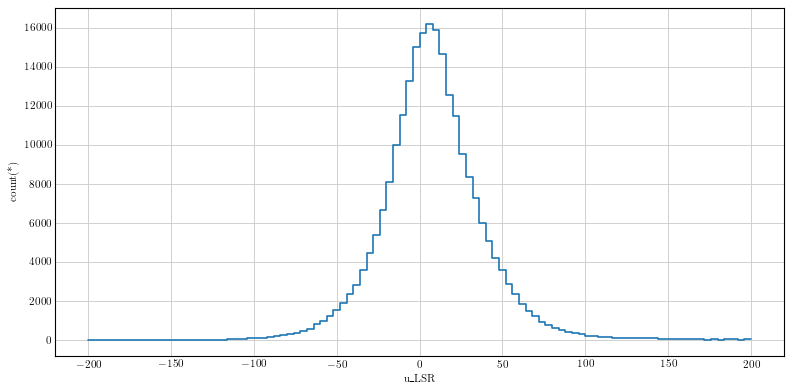

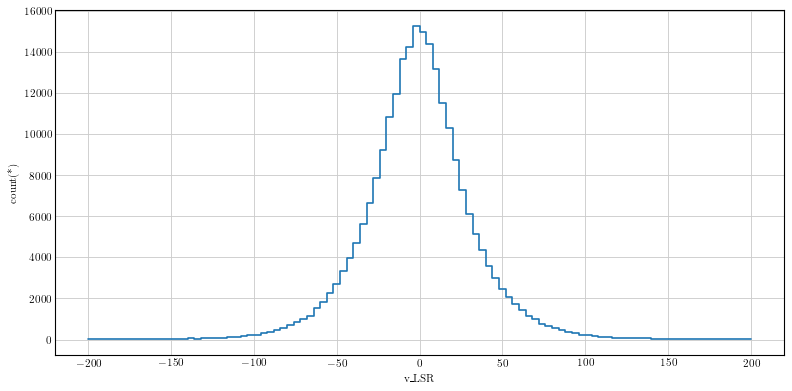

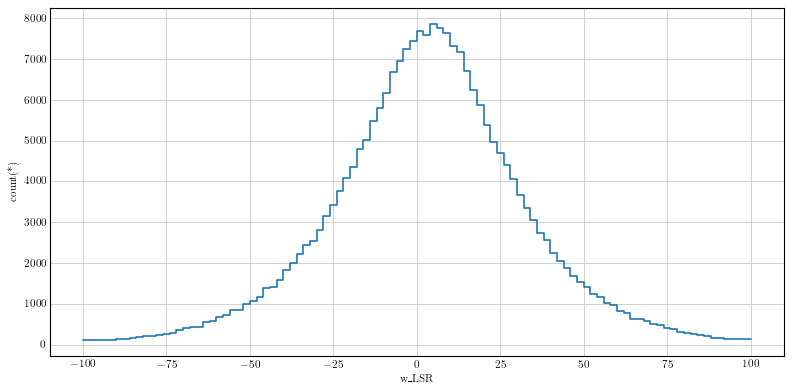

In [26]:
gums.viz.histogram("u_LSR", shape=100, limits=[-200, 200], figsize=(10, 5))
gums.viz.histogram("v_LSR", shape=100, limits=[-200, 200], figsize=(10, 5))
gums.viz.histogram("w_LSR", shape=100, limits=[-100, 100], figsize=(10, 5))

In [16]:
from scipy.stats import norm

gums["f_D"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=16))
gums["f_TD"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=35))
gums["f_H"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=90))
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347,-44.1578183240961,-25.554559726261676,-27.493075284448018,-47.50753824702857,-12.697716012351675,39.195785912958144,60.53181983490219,11.365500917349554,11.365500917349554,60.53181983490219,-5.447716012351675,4.058335880652478e-09,1.3634496987879e-08,3.788536339645391e-10
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797,28.473634025492693,-11.262638528177819,-15.996664755560607,40.44196009121344,5.241861868748911,43.547771487442176,-5.520665154223252,-59.173328398837995,-59.173328398837995,-5.520665154223252,12.491861868748911,8.947136761796601e-07,2.5665935941199204e-07,2.6486354088081457e-09
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892,28.87763129768149,8.445531812493831,10.426571642161822,35.65135959061671,9.505500776958895,4.968219851424328,-35.75365911538647,-4.168753892026574,-4.168753892026574,-35.75365911538647,16.755500776958897,1.8987695435144873e-06,6.11517867267527e-07,5.921035960048681e-09
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535,0.49218105766486064,-12.42663633231653,-15.266572145556156,0.6046622291485384,-14.024544876431092,-21.388737788681116,-14.420150543331557,15.808319926923577,15.808319926923577,-14.420150543331557,-6.774544876431092,4.678449677748025e-06,4.815138427417376e-07,3.5791001469171246e-09
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068,21.584397055096975,-21.106067151123924,-18.53348884405539,18.953516027499205,-23.58386577832932,0.07013688897933257,18.953644962935353,0.005621997881212967,0.005621997881212967,18.953644962935353,-16.33386577832932,7.968244096771883e-07,1.4827418202375752e-07,1.4198741144131493e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455,58.59178862713121,-11.022166109549792,-14.120552799969209,75.0622370168431,-1.9435983284166527,16.669335968510023,-74.77914003965257,17.89654722380328,17.89654722380328,-74.77914003965257,5.306401671583347,5.406160125714204e-08,5.102340137895654e-07,1.322180238077756e-08
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897,158.87110770376572,216.5334954688657,10.654416,10.724911888327753,-6.102031155149101,-7.7678538356413895,13.652756898555534,-11.270329962038648,-2.229705041049378,5.8263447431972395,-12.5468347576014,-12.5468347576014,5.8263447431972395,-4.020329962038648,2.995263874720579e-06,2.744164662028681e-07,

In [17]:
gums["fTD_fD"] = gums["f_TD"]/gums["f_D"]
gums["fTD_fH"] = gums["f_TD"]/gums["f_H"]
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347,-44.1578183240961,-25.554559726261676,-27.493075284448018,-47.50753824702857,-12.697716012351675,39.195785912958144,60.53181983490219,11.365500917349554,11.365500917349554,60.53181983490219,-5.447716012351675,4.058335880652478e-09,1.3634496987879e-08,3.788536339645391e-10,3.3596275391791663,35.98882461598665
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797,28.473634025492693,-11.262638528177819,-15.996664755560607,40.44196009121344,5.241861868748911,43.547771487442176,-5.520665154223252,-59.173328398837995,-59.173328398837995,-5.520665154223252,12.491861868748911,8.947136761796601e-07,2.5665935941199204e-07,2.6486354088081457e-09,0.2868620054047932,96.90248743124886
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892,28.87763129768149,8.445531812493831,10.426571642161822,35.65135959061671,9.505500776958895,4.968219851424328,-35.75365911538647,-4.168753892026574,-4.168753892026574,-35.75365911538647,16.755500776958897,1.8987695435144873e-06,6.11517867267527e-07,5.921035960048681e-09,0.32206007798905967,103.27886393422601
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535,0.49218105766486064,-12.42663633231653,-15.266572145556156,0.6046622291485384,-14.024544876431092,-21.388737788681116,-14.420150543331557,15.808319926923577,15.808319926923577,-14.420150543331557,-6.774544876431092,4.678449677748025e-06,4.815138427417376e-07,3.5791001469171246e-09,0.10292166762676706,134.5348894907263
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068,21.584397055096975,-21.106067151123924,-18.53348884405539,18.953516027499205,-23.58386577832932,0.07013688897933257,18.953644962935353,0.005621997881212967,0.005621997881212967,18.953644962935353,-16.33386577832932,7.968244096771883e-07,1.4827418202375752e-07,1.4198741144131493e-09,0.18608137529801172,104.42769575036657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455,58.59178862713121,-11.022166109549792,-14.120552799969209,75.0622370168431,-1.9435983284166527,16.669335968510023,-74.77914003965257,17.89654722380328,17.89654722380328,-74.77914003965257,5.306401671583347,5.406160125714204e-08,5.102340137895654e-07,1.322180238077756e-08,9.43801148920203,38.590352441764374
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0.01587077,0.261,1,5.015,3419.7944,M2.5V,2.8687411920450803,0.6329886798787897,158.87110770376572,216.5334954688657,10.654416,10.72

In [18]:
gums["TD_D"] = gums["fTD_fD"]*0.09/0.85
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347,-44.1578183240961,-25.554559726261676,-27.493075284448018,-47.50753824702857,-12.697716012351675,39.195785912958144,60.53181983490219,11.365500917349554,11.365500917349554,60.53181983490219,-5.447716012351675,4.058335880652478e-09,1.3634496987879e-08,3.788536339645391e-10,3.3596275391791663,35.98882461598665,0.3557252688542647
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797,28.473634025492693,-11.262638528177819,-15.996664755560607,40.44196009121344,5.241861868748911,43.547771487442176,-5.520665154223252,-59.173328398837995,-59.173328398837995,-5.520665154223252,12.491861868748911,8.947136761796601e-07,2.5665935941199204e-07,2.6486354088081457e-09,0.2868620054047932,96.90248743124886,0.030373624101683983
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892,28.87763129768149,8.445531812493831,10.426571642161822,35.65135959061671,9.505500776958895,4.968219851424328,-35.75365911538647,-4.168753892026574,-4.168753892026574,-35.75365911538647,16.755500776958897,1.8987695435144873e-06,6.11517867267527e-07,5.921035960048681e-09,0.32206007798905967,103.27886393422601,0.03410047884590044
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535,0.49218105766486064,-12.42663633231653,-15.266572145556156,0.6046622291485384,-14.024544876431092,-21.388737788681116,-14.420150543331557,15.808319926923577,15.808319926923577,-14.420150543331557,-6.774544876431092,4.678449677748025e-06,4.815138427417376e-07,3.5791001469171246e-09,0.10292166762676706,134.5348894907263,0.010897588336951806
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068,21.584397055096975,-21.106067151123924,-18.53348884405539,18.953516027499205,-23.58386577832932,0.07013688897933257,18.953644962935353,0.005621997881212967,0.005621997881212967,18.953644962935353,-16.33386577832932,7.968244096771883e-07,1.4827418202375752e-07,1.4198741144131493e-09,0.18608137529801172,104.42769575036657,0.019702733855083594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455,58.59178862713121,-11.022166109549792,-14.120552799969209,75.0622370168431,-1.9435983284166527,16.669335968510023,-74.77914003965257,17.89654722380328,17.89654722380328,-74.77914003965257,5.306401671583347,5.406160125714204e-08,5.102340137895654e-07,1.322180238077756e-08,9.43801148920203,38.590352441764374,0.9993188635625678
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0

Text(-3, 4, 'Piringan tebal')

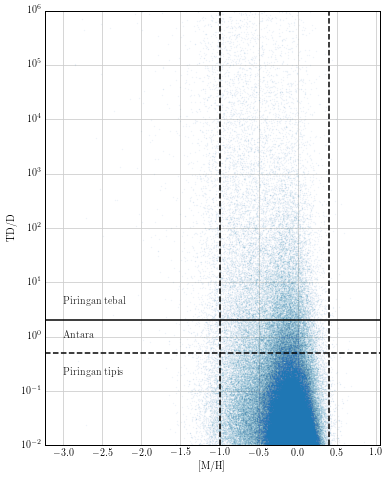

In [19]:
plt.figure(figsize=(6, 8))
gums.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.1)
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-1, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")

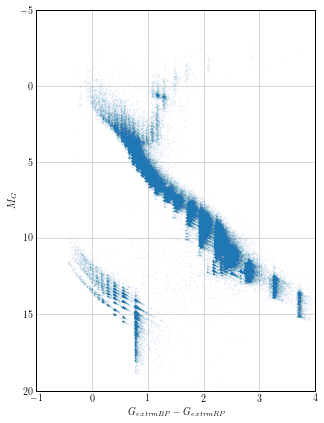

In [21]:
plt.figure(figsize=(5, 7))
gums.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1)
plt.xlabel("$G_{\textrm{BP}} - G_{\textrm{RP}}$")
plt.ylabel("$M_G$")
# reverse y-axis
plt.xlim(-1,4)
plt.ylim(-5, 20)
plt.gca().invert_yaxis()
plt.show()

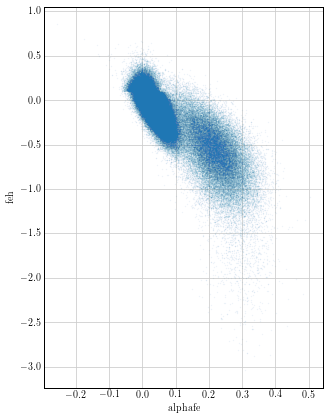

In [22]:
plt.figure(figsize=(5, 7))
gums.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1)
# reverse y-axis
# plt.xlim(-1,4)
# plt.ylim(-5, 20)
plt.show()

In [23]:
gums_thin = gums.filter("population == 1")
gums_thin = gums_thin.extract()
gums_thick = gums.filter("population == 2")
gums_thick = gums_thick.extract()
gums_halo = gums.filter("population == 3")
gums_halo = gums_halo.extract()

In [24]:
len(gums_thin), len(gums_thick), len(gums_halo)

(194015, 45033, 1229)

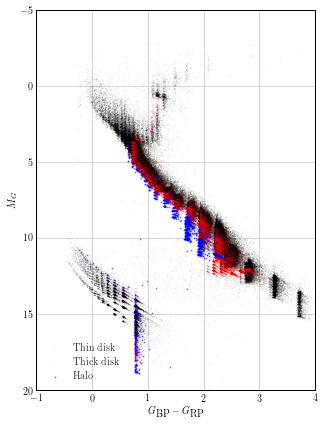

In [25]:
plt.figure(figsize=(5, 7))
gums_thin.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="k")
gums_thick.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="r")
gums_halo.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.5, alpha=0.5, c="b")
plt.xlabel(r"$G_{\textup{BP}} - G_{\textup{RP}}$")
plt.ylabel(r"$M_G$")
# reverse y-axis
plt.xlim(-1,4)
plt.ylim(-5, 20)
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.gca().invert_yaxis()
plt.show()

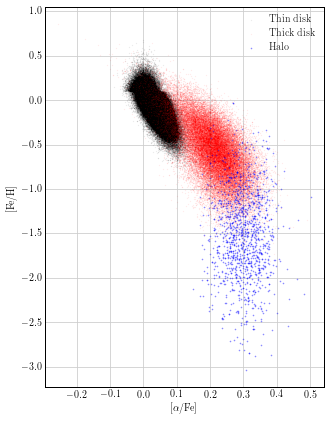

In [27]:
plt.figure(figsize=(5, 7))
gums_thin.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="k")
gums_thick.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="r")
gums_halo.viz.scatter("alphafe", "feh", length_check=False, s=0.4, alpha=0.4, c="b")
plt.xlabel(r"[$\alpha$/Fe]")
plt.ylabel("[Fe/H]")
plt.legend(["Thin disk", "Thick disk", "Halo"])
# reverse y-axis
# plt.xlim(-1,4)
# plt.ylim(-5, 20)
plt.show()

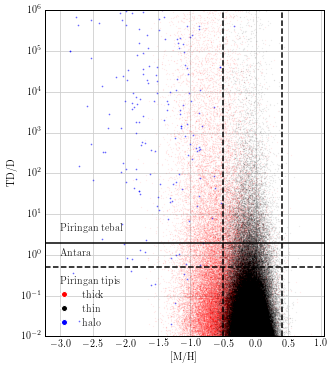

In [28]:
from matplotlib.lines import Line2D

plt.figure(figsize=(5, 6))
gums_thick.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.1, c="r")
gums_thin.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.1, c="k")
gums_halo.viz.scatter("feh", "TD_D", length_check=False, s=0.5, alpha=0.5, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")
handles = [Line2D([0], [0], marker='o', color='w', label='thick', markerfacecolor='r'), 
           Line2D([0], [0], marker='o', color='w', label='thin', markerfacecolor='k'),
           Line2D([0], [0], marker='o', color='w', label='halo', markerfacecolor='b')]
plt.legend(loc="best", handles=handles)
# plt.savefig("TD_D.pdf", format="pdf", bbox_inches="tight")
plt.show()

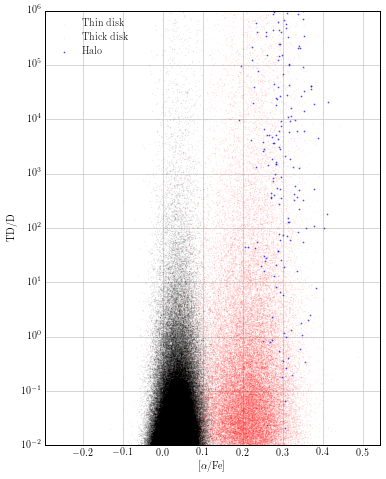

In [29]:
plt.figure(figsize=(6, 8))
gums_thick.viz.scatter("alphafe", "TD_D", length_check=False, s=0.1, alpha=0.1, c="r")
gums_thin.viz.scatter("alphafe", "TD_D", length_check=False, s=0.1, alpha=0.1, c="k")
gums_halo.viz.scatter("alphafe", "TD_D", length_check=False, s=0.6, alpha=0.6, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
# plt.axvline(0.4, c="k", ls="--")
# plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
# plt.axhline(2, c="k")
# plt.axhline(-0.5, c="k", ls="--")
plt.xlabel(r"[$\alpha$/Fe]")
plt.ylabel("TD/D")
# plt.text(-3, 2E-1, "Piringan tipis")
# plt.text(-3, 0.9, "Antara")
# plt.text(-3, 4, "Piringan tebal")
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.show()

In [30]:
gums.export(join(data_dir, "gums-filtered.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :  3753.51s =  62.6m =  1.0hh  
 

# Defining boundary

In [6]:
gums = vaex.open(join(data_dir, "gums-filtered.hdf5"))
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D
0,3.2832381131548485,-0.6774454346702863,226.97424,-46.071877,-21.916447,30.686682,11.266117,11.548039,10.806672,-0.25296736,0.057027582,1.053,1,4.387,5956.6216,F9V,5.21661506250531,0.41727365515661485,91.98574834180965,207.49922689469528,4.4862347,-44.1578183240961,-25.554559726261676,-27.493075284448018,-47.50753824702857,-12.697716012351675,39.195785912958144,60.53181983490219,11.365500917349554,11.365500917349554,60.53181983490219,-5.447716012351675,4.058335880652478e-09,1.3634496987879e-08,3.788536339645391e-10,3.3596275391791663,35.98882461598665,0.3557252688542647
1,1.9399424481424514,1.3339913623826332,299.6477,-11.835173,-28.24046,40.84106,19.221851,20.764042,17.95465,-0.07538204,0.031052146,0.176,1,5.102,3235.9365,M4V,2.412260091130099,0.493108293839103,141.84308352705887,263.9494019961454,11.838797,28.473634025492693,-11.262638528177819,-15.996664755560607,40.44196009121344,5.241861868748911,43.547771487442176,-5.520665154223252,-59.173328398837995,-59.173328398837995,-5.520665154223252,12.491861868748911,8.947136761796601e-07,2.5665935941199204e-07,2.6486354088081457e-09,0.2868620054047932,96.90248743124886,0.030373624101683983
2,1.227897489753159,-0.8520918311822404,260.4571,6.1272497,-29.456772,-2.5148275,16.767881,17.86168,15.674633,0.05396015,0.036843754,1.3,1,nan,nan,,4.4578525505499735,-0.7182907558882784,-171.40647120293744,196.10639599817998,9.6892,28.87763129768149,8.445531812493831,10.426571642161822,35.65135959061671,9.505500776958895,4.968219851424328,-35.75365911538647,-4.168753892026574,-4.168753892026574,-35.75365911538647,16.755500776958897,1.8987695435144873e-06,6.11517867267527e-07,5.921035960048681e-09,0.32206007798905967,103.27886393422601,0.03410047884590044
3,5.095611660401182,0.17491899463773927,259.18484,11.1730995,-5.4612617,-20.520666,14.543601,15.192817,13.738374,-0.06067381,0.03141621,0.69,1,4.696,4415.7046,K5V,0.8030259088255601,-0.05925466475632339,-15.348925443526685,258.72996415223434,7.4755535,0.49218105766486064,-12.42663633231653,-15.266572145556156,0.6046622291485384,-14.024544876431092,-21.388737788681116,-14.420150543331557,15.808319926923577,15.808319926923577,-14.420150543331557,-6.774544876431092,4.678449677748025e-06,4.815138427417376e-07,3.5791001469171246e-09,0.10292166762676706,134.5348894907263,0.010897588336951806
4,4.403504724937767,1.0494942921338755,185.25568,16.081308,25.548851,-14.584699,15.958925,17.085972,14.852712,0.09029758,-0.0040098876,0.402,1,4.906,3564.5112,M1.5V,1.5667992569000702,0.6696990669807319,114.99747606876576,145.24202590123497,9.620068,21.584397055096975,-21.106067151123924,-18.53348884405539,18.953516027499205,-23.58386577832932,0.07013688897933257,18.953644962935353,0.005621997881212967,0.005621997881212967,18.953644962935353,-16.33386577832932,7.968244096771883e-07,1.4827418202375752e-07,1.4198741144131493e-09,0.18608137529801172,104.42769575036657,0.019702733855083594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,298",3.0204624495883183,-0.12651113611183037,270.27533,46.310154,-37.548042,9.069417,19.510487,21.054615,18.234064,0.22374736,0.020774893,0.147,1,5.156,3169.5674,M4V,4.728768752663778,0.8837907850883209,208.96300306513228,171.41533518008293,12.351455,58.59178862713121,-11.022166109549792,-14.120552799969209,75.0622370168431,-1.9435983284166527,16.669335968510023,-74.77914003965257,17.89654722380328,17.89654722380328,-74.77914003965257,5.306401671583347,5.406160125714204e-08,5.102340137895654e-07,1.322180238077756e-08,9.43801148920203,38.590352441764374,0.9993188635625678
"240,299",2.2347215183543203,0.9402490155597187,268.5643,-6.587887,-10.4335165,-8.464772,17.799658,19.081314,16.622993,-0.13759051,-0

In [7]:
gums_thin = gums.filter("population == 1")
gums_thin = gums_thin.extract()
gums_thick = gums.filter("population == 2")
gums_thick = gums_thick.extract()
gums_halo = gums.filter("population == 3")
gums_halo = gums_halo.extract()

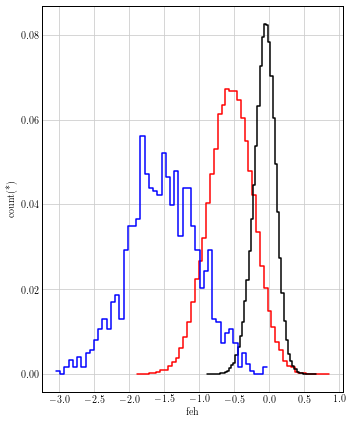

In [8]:
plt.figure(figsize=(5, 6))
gums_thick.viz.histogram("feh", shape=50, n="normalize", label="Thick disk", c="r")
gums_thin.viz.histogram("feh", shape=50, n="normalize", label="Thin disk", c="k")
gums_halo.viz.histogram("feh", shape=50, n="normalize", label="Halo", c="b")
plt.show()

In [13]:
feh_thick = gums_thick['feh'].to_numpy()
feh_thin = gums_thin['feh'].to_numpy()
feh_halo = gums_halo['feh'].to_numpy()

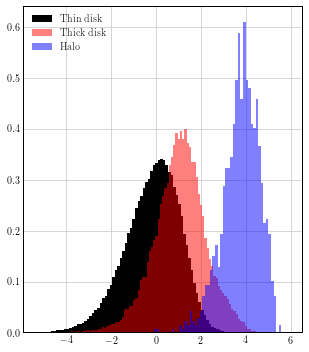

In [9]:
TD_D_thick = np.log(gums_thick['TD_D'].to_numpy())
TD_D_thin = np.log(gums_thin['TD_D'].to_numpy())
TD_D_halo = np.log(gums_halo['TD_D'].to_numpy())
min_val = np.min([np.min(TD_D_thick), np.min(TD_D_thin), np.min(TD_D_halo)])*1.001
TD_D_thick = np.log(TD_D_thick - min_val)
TD_D_thin = np.log(TD_D_thin - min_val)
TD_D_halo = np.log(TD_D_halo - min_val)

plt.figure(figsize=(5, 6))
plt.hist(TD_D_thin, bins=100, density=True, label="Thin disk", color="k")
plt.hist(TD_D_thick, bins=100, density=True, label="Thick disk", color="r", alpha=0.5)
plt.hist(TD_D_halo, bins=50, density=True, label="Halo", color="b", alpha=0.5)
plt.legend()
plt.show()

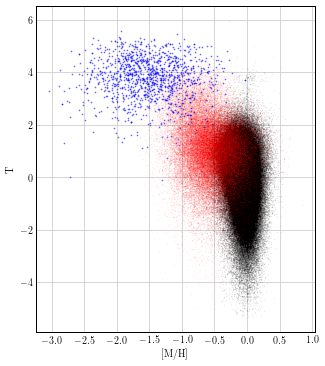

In [10]:
from matplotlib.lines import Line2D

plt.figure(figsize=(5, 6))
gums_thin.viz.scatter("feh", f"log(log(TD_D)-{min_val})", length_check=False, s=0.1, alpha=0.1, c="k", label="Thin disk")
gums_thick.viz.scatter("feh", f"log(log(TD_D)-{min_val})", length_check=False, s=0.1, alpha=0.1, c="r", label="Thick disk")
gums_halo.viz.scatter("feh", f"log(log(TD_D)-{min_val})", length_check=False, s=0.5, alpha=0.5, c="b", label="Halo")
plt.ylabel("T")
plt.xlabel("[M/H]")
plt.show()

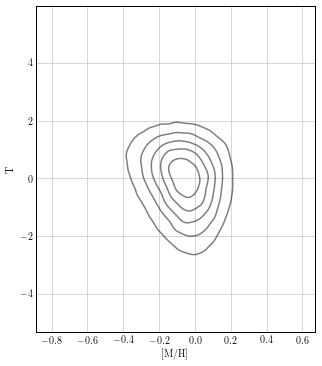

In [14]:
# use gaussian kde to estimate density
from scipy.stats import gaussian_kde

kde_thin = gaussian_kde(np.vstack([feh_thin, TD_D_thin]))

# plot contours on thin disk: Feh vs TD_D from data points
ts = np.linspace(TD_D_thin.min(), TD_D_thin.max(), 100)
fs = np.linspace(feh_thin.min(), feh_thin.max(), 100)
T, Feh = np.meshgrid(ts, fs)
Z = kde_thin(np.vstack([Feh.ravel(), T.ravel()]))
Z = Z.reshape(T.shape)
# plot contours on thin disk: Feh vs TD_D from data points
plt.figure(figsize=(5, 6))
plt.contour(Feh, T, Z, colors="k", alpha=0.5)
plt.ylabel("T")
plt.xlabel("[M/H]")
plt.show()

In [15]:
max_Z = np.max(Z)
max_Z

0.8762330370273279

In [21]:
zs = np.linspace(0, max_Z, 100)
dFeh = fs[1] - fs[0]
dT = ts[1] - ts[0]
alpha = 0.9

integrals = []
z_s = []

for i, z in enumerate(zs):
    mask = Z > z
    Z_mask = Z[mask]
    integral = np.sum(Z_mask)*dFeh*dT
    integrals.append(integral)
    z_s.append(z)
    if integral <alpha*0.8:
        break

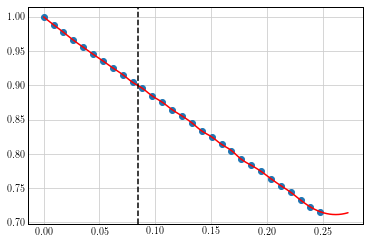

array(0.08420979)

In [29]:
zs = np.linspace(0, np.max(z_s)*1.1, 100)

z_interp = interpolate.interp1d(integrals, z_s, kind="quadratic", fill_value="extrapolate")
integral_interp = interpolate.interp1d(z_s, integrals, kind="quadratic", fill_value="extrapolate")

plt.plot(zs, integral_interp(zs), 'r')
plt.axvline(z_interp(alpha), c="k", ls="--")
plt.scatter(z_s, integrals)
plt.show()
z_interp(alpha)

In [18]:
ts = np.linspace(TD_D_thin.min(), TD_D_thin.max(), 100)
fs = np.linspace(feh_thin.min(), feh_thin.max(), 100)

T, Feh = np.meshgrid(ts, fs)

z = kde_thin(np.vstack([Feh.ravel(), T.ravel()]))
z = z.reshape(T.shape)
alpha = 0.9
mask = z > z_interp(alpha)
z[mask] = 1
z[~mask] = 0

# plot contour
plt.figure(figsize=(5, 6))
plt.contour(Feh, T, z, colors="k", alpha=0.5)
plt.ylabel("T")
plt.xlabel("[M/H]")
plt.show()

In [ ]:
# interp 2D of z from Feh and T

In [32]:
# pickle the kde_thin
import pickle

with open("kde_thin.pkl", "wb") as f:
    pickle.dump(kde_thin, f)

In [11]:
# load pickle the kde_thin
import pickle

kde_thin = None
with open("kde_thin.pkl", "rb") as f:
    kde_thin = pickle.load(f)

kde_thin

In [16]:
z_thin = kde_thin(np.vstack([feh_thin[:1000], TD_D_thin[:1000]]))
z_thin

array([2.77457413e-01, 8.63331979e-01, 6.19439667e-01, 5.09890344e-01,
       5.31541981e-01, 1.58576780e-01, 2.65625559e-01, 9.65142410e-02,
       8.24749838e-01, 6.55514538e-01, 8.17434016e-02, 4.72817073e-02,
       5.55766579e-01, 2.07743845e-01, 5.97807038e-01, 1.31876999e-01,
       5.06565591e-02, 2.05107331e-01, 1.84331797e-01, 3.59505743e-01,
       7.18576634e-01, 9.08554983e-02, 2.67341817e-01, 5.18251525e-01,
       4.28148280e-01, 3.00355560e-01, 7.75588342e-01, 5.65578500e-01,
       1.62614490e-01, 3.02941302e-01, 2.02324852e-01, 6.74131511e-01,
       5.12508951e-02, 2.15086342e-01, 8.41512431e-01, 8.32492646e-01,
       3.92460330e-01, 6.63949380e-01, 3.36991850e-01, 1.31364411e-02,
       6.26062996e-01, 1.17746494e-02, 5.53879462e-01, 7.65290678e-01,
       6.64488583e-01, 3.49717007e-01, 4.61580401e-01, 6.47008740e-01,
       7.31720019e-01, 3.01422884e-02, 6.03593535e-01, 7.67163699e-01,
       6.37623360e-01, 8.30828867e-01, 8.57600635e-01, 7.15058266e-01,
      

## Filter by kde_thin

In [34]:
z_thin = kde_thin(np.vstack([feh_thin, TD_D_thin]))
z_thick = kde_thin(np.vstack([feh_thick, TD_D_thick]))
z_halo = kde_thin(np.vstack([feh_halo, TD_D_halo]))

mask = z_thin > z_interp(alpha)
feh_thin_mask = feh_thin[mask]
TD_D_thin_mask = TD_D_thin[mask]
mask = z_thick > z_interp(alpha)
feh_thick_mask = feh_thick[mask]
TD_D_thick_mask = TD_D_thick[mask]
mask = z_halo > z_interp(alpha)
feh_halo_mask = feh_halo[mask]
TD_D_halo_mask = TD_D_halo[mask]

# plot scatter
plt.figure(figsize=(5, 6))
plt.scatter(feh_thin_mask, TD_D_thin_mask, s=0.1, alpha=0.1, c="k", label="Thin disk")
plt.scatter(feh_thick_mask, TD_D_thick_mask, s=0.1, alpha=0.1, c="r", label="Thick disk")
plt.scatter(feh_halo_mask, TD_D_halo_mask, s=0.5, alpha=0.5, c="b", label="Halo")
plt.ylabel("T")
plt.xlabel("[M/H]")
plt.show()